# The Multivariate Gaussian distribution

The density of a multivariate Gaussian with mean vector $\mu$ and covariance matrix $\Sigma$ is given as

\begin{align}
\mathcal{N}(x; \mu, \Sigma) &= |2\pi \Sigma|^{-1/2} \exp\left( -\frac{1}{2} (x-\mu)^\top \Sigma^{-1} (x-\mu) \right) \\
& = \exp\left(-\frac{1}{2} x^\top \Sigma^{-1} x + \mu^\top \Sigma^{-1} x   - \frac{1}{2} \mu^\top \Sigma^{-1} \mu   -\frac{1}{2}\log \det(2\pi \Sigma) \right) \\
\end{align}

Here, $|X|$ denotes the determinant of a square matrix.

$\newcommand{\trace}{\mathop{Tr}}$

\begin{align}
{\cal N}(s; \mu, P) & =  |2\pi P|^{-1/2} \exp\left(-\frac{1}2 (s-\mu)^\top P^{-1} (s-\mu) \right)
\\
& =   \exp\left(
-\frac{1}{2}s^\top{P^{-1}}s  + \mu^\top P^{-1}s  { -\frac{1}{2}\mu^\top{P^{-1}\mu -\frac12|2\pi P|}}
\right) \\
\log {\cal N}(s; \mu, P) & =  -\frac{1}{2}s^\top{P^{-1}}s  + \mu^\top P^{-1}s + \text{ const} \\
& =  -\frac{1}{2}\trace {P^{-1}} s s^\top  + \mu^\top P^{-1}s + \text{ const} \\
\end{align}


## Special Cases

To gain the intuition, we take a look to a few special cases

### Bivariate Gaussian

#### Example 1: Identity covariance matrix

$
x = \left(\begin{array}{c} x_1 \\ x_2 \end{array} \right)
$

$
\mu = \left(\begin{array}{c} 0 \\ 0 \end{array} \right)
$

$
\Sigma = \left(\begin{array}{cc} 1& 0 \\ 0 & 1 \end{array} \right) = I_2
$

\begin{align}
\mathcal{N}(x; \mu, \Sigma) &= |2\pi I_{2}|^{-1/2} \exp\left( -\frac{1}{2} x^\top x \right) 
= (2\pi)^{-1} \exp\left( -\frac{1}{2} \left( x_1^2 + x_2^2\right)  \right) =  (2\pi)^{-1/2} \exp\left( -\frac{1}{2} x_1^2  \right)(2\pi)^{-1/2} \exp\left( -\frac{1}{2} x_2^2 \right)\\
& = \mathcal{N}(x; 0, 1) \mathcal{N}(x; 0, 1)
\end{align}

#### Example 2: Diagonal covariance
$\newcommand{\diag}{\text{diag}}$

$
x = \left(\begin{array}{c} x_1 \\ x_2 \end{array} \right)
$

$
\mu = \left(\begin{array}{c} \mu_1 \\ \mu_2 \end{array} \right)
$

$
\Sigma = \left(\begin{array}{cc} s_1 & 0 \\ 0 & s_2 \end{array} \right) = \diag(s_1, s_2)
$

\begin{eqnarray}
\mathcal{N}(x; \mu, \Sigma) &=& \left|2\pi \left(\begin{array}{cc} s_1 & 0 \\ 0 & s_2 \end{array} \right)\right|^{-1/2} \exp\left( -\frac{1}{2} \left(\begin{array}{c} x_1 - \mu_1 \\ x_2-\mu_2 \end{array} \right)^\top \left(\begin{array}{cc} 1/s_1 & 0 \\ 0 & 1/s_2 \end{array} \right) \left(\begin{array}{c} x_1 - \mu_1 \\ x_2-\mu_2 \end{array} \right) \right) \\
&=& ((2\pi)^2 s_1 s_2 )^{-1/2} \exp\left( -\frac{1}{2} \left( \frac{(x_1-\mu_1)^2}{s_1} + \frac{(x_2-\mu_2)^2}{s_2}\right)  \right) \\
& = &\mathcal{N}(x; \mu_1, s_1) \mathcal{N}(x; \mu_2, s_2)
\end{eqnarray}

#### Example 3:
$
x = \left(\begin{array}{c} x_1 \\ x_2 \end{array} \right)
$

$
\mu = \left(\begin{array}{c} \mu_1 \\ \mu_2 \end{array} \right)
$

$
\Sigma = \left(\begin{array}{cc} 1 & \rho \\ \rho & 1 \end{array} \right)
$
for $1<\rho<-1$.

Need $K = \Sigma^{-1}$. When $|\Sigma| \neq 0$ we have $K\Sigma^{-1} = I$. 

$
\left(\begin{array}{cc} 1 & \rho \\ \rho & 1 \end{array} \right) \left(\begin{array}{cc} k_{11} & k_{12} \\ k_{21} & k_{22} \end{array} \right) = \left(\begin{array}{cc} 1& 0 \\ 0 & 1 \end{array} \right)
$

\begin{align}
k_{11} &+ \rho k_{21} & & &=1 \\ 
\rho k_{11} &+ k_{21} & & &=0 \\ 
&& k_{12} &+ \rho k_{22} &=0 \\ 
&& \rho k_{12} &+ k_{22} &=1 \\ 
\end{align}

Solving these equations leads to the solution

$$
\left(\begin{array}{cc} k_{11} & k_{12} \\ k_{21} & k_{22} \end{array} \right) = \frac{1}{1-\rho^2}\left(\begin{array}{cc} 1 & -\rho \\ -\rho & 1 \end{array} \right)
$$

Plotting the Equal probability contours

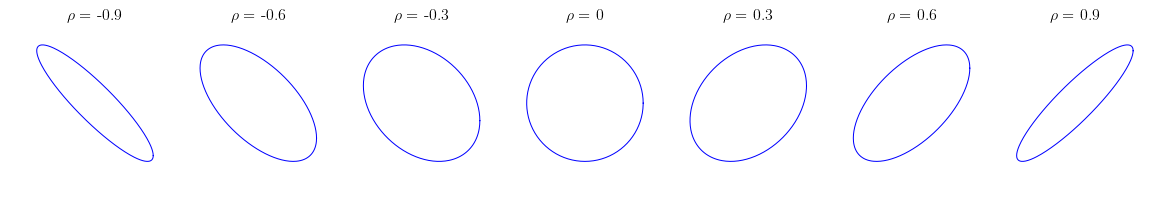

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from notes_utilities import pnorm_ball_points

RHO = np.arange(-0.9,1,0.3)
plt.figure(figsize=(20,20/len(RHO)))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for i,rho in enumerate(RHO):
    plt.subplot(1,len(RHO),i+1)
    plt.axis('equal')
    ax = plt.gca()
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)

    S = np.mat([[1, rho],[rho,1]])
    A = np.linalg.cholesky(S)
    dx,dy = pnorm_ball_points(3*A)
    plt.title(r'$\rho =$ '+str(rho if np.abs(rho)>1E-9 else 0), fontsize=16)
    ln = plt.Line2D(dx,dy,markeredgecolor='k', linewidth=1, color='b')
    ax.add_line(ln)
    ax.set_axis_off()
    #ax.set_visible(False)
    
plt.show()

In [8]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
from matplotlib import rc

from notes_utilities import bmatrix, pnorm_ball_line


rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

fig = plt.figure(figsize=(5,5))

S = np.array([[1,0],[0,1]])

dx,dy = pnorm_ball_points(S)
ln = plt.Line2D(dx,dy,markeredgecolor='k', linewidth=1, color='b')

dx,dy = pnorm_ball_points(np.eye(2))
ln2 = plt.Line2D(dx,dy,markeredgecolor='k', linewidth=1, color='k',linestyle=':')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax = fig.gca()
ax.set_xlim((-4,4))
ax.set_ylim((-4,4))
txt = ax.text(-1,-3,'$\left(\right)$',fontsize=15)
ax.add_line(ln)
ax.add_line(ln2)

plt.close(fig)

def set_line(s_1, s_2, rho, p, a, q):
    S = np.array([[s_1**2, rho*s_1*s_2],[rho*s_1*s_2, s_2**2]])
    A = np.linalg.cholesky(S)
    #S = A.dot(A.T)
    dx,dy = pnorm_ball_points(A,p=p)
    ln.set_xdata(dx)
    ln.set_ydata(dy)
    dx,dy = pnorm_ball_points(a*np.eye(2),p=q)
    ln2.set_xdata(dx)
    ln2.set_ydata(dy)
    
    txt.set_text(bmatrix(S))
    display(fig)
    ax.set_axis_off()
    
interact(set_line, s_1=(0.1,2,0.01), s_2=(0.1, 2, 0.01), rho=(-0.99, 0.99, 0.01), p=(0.1,4,0.1), a=(0.2,10,0.1), q=(0.1,4,0.1))



interactive(children=(FloatSlider(value=1.05, description='s_1', max=2.0, min=0.1, step=0.01), FloatSlider(value=1.05, description='s_2', max=2.0, min=0.1, step=0.01), FloatSlider(value=0.0, description='rho', max=0.99, min=-0.99, step=0.01), FloatSlider(value=2.0, description='p', max=4.0, min=0.1), FloatSlider(value=5.1000000000000005, description='a', max=10.0, min=0.2), FloatSlider(value=2.0, description='q', max=4.0, min=0.1), Output()), _dom_classes=('widget-interact',))

<function __main__.set_line>

/Users/cemgil/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/cemgil/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/cemgil/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/cemgil/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/cemgil/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: fin

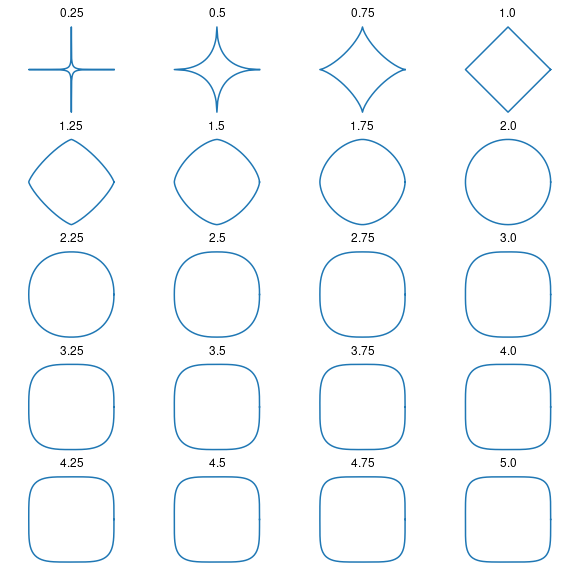

<Figure size 432x288 with 0 Axes>

In [9]:
%run plot_normballs.py

In [10]:
%run matrix_norm_sliders.py


interactive(children=(FloatSlider(value=1.0, description='a_11', max=2.0, min=-2.0, step=0.01), FloatSlider(value=0.0, description='a_21', max=2.0, min=-2.0, step=0.01), FloatSlider(value=0.0, description='a_12', max=2.0, min=-2.0, step=0.01), FloatSlider(value=1.0, description='a_22', max=2.0, min=-2.0, step=0.01), FloatSlider(value=2.0, description='q', max=5.0, min=0.1), FloatSlider(value=2.0, description='r', max=5.0, min=0.2), FloatSlider(value=2.0, description='p', max=5.0, min=0.1), Output()), _dom_classes=('widget-interact',))

Exercise:

$
x = \left(\begin{array}{c} x_1 \\ x_2 \end{array} \right)
$

$
\mu = \left(\begin{array}{c} \mu_1 \\ \mu_2 \end{array} \right)
$

$
\Sigma = \left(\begin{array}{cc} s_{11} & s_{12} \\ s_{12} & s_{22} \end{array} \right)
$


Need $K = \Sigma^{-1}$. When $|\Sigma| \neq 0$ we have $K\Sigma^{-1} = I$. 

$
\left(\begin{array}{cc} s_{11} & s_{12} \\ s_{12} & s_{22} \end{array} \right) \left(\begin{array}{cc} k_{11} & k_{12} \\ k_{21} & k_{22} \end{array} \right) = \left(\begin{array}{cc} 1& 0 \\ 0 & 1 \end{array} \right)
$

Derive the result
$$
K = \left(\begin{array}{cc} k_{11} & k_{12} \\ k_{21} & k_{22} \end{array} \right)
$$


Step 1: Verify 

$$
\left(\begin{array}{cc} s_{11} & s_{12} \\ s_{21} & s_{22} \end{array} \right) = \left(\begin{array}{cc} 1 & -s_{12}/s_{22} \\ 0 & 1 \end{array} \right) \left(\begin{array}{cc} s_{11}-s_{12}^2/s_{22} & 0 \\ 0 & s_{22} \end{array} \right) \left(\begin{array}{cc} 1 & 0 \\ -s_{12}/s_{22} & 1 \end{array} \right)
$$

Step 2: Show that
$$
\left(\begin{array}{cc} 1 & a\\ 0 & 1 \end{array} \right)^{-1} = \left(\begin{array}{cc} 1 & -a\\ 0 & 1 \end{array} \right)
$$
and
$$
\left(\begin{array}{cc} 1 & 0\\ b & 1 \end{array} \right)^{-1} = \left(\begin{array}{cc} 1 & 0\\ -b & 1 \end{array} \right)
$$

Step 3: Using the fact $(A B)^{-1} = B^{-1} A^{-1}$ and $s_{12}=s_{21}$, show that and simplify
$$
\left(\begin{array}{cc} s_{11} & s_{12} \\ s_{21} & s_{22} \end{array} \right)^{-1} =  
\left(\begin{array}{cc} 1 & 0 \\ s_{12}/s_{22} & 1 \end{array} \right)
\left(\begin{array}{cc} 1/(s_{11}-s_{12}^2/s_{22}) & 0 \\ 0 & 1/s_{22} \end{array} \right) \left(\begin{array}{cc} 1 & s_{12}/s_{22} \\ 0 & 1 \end{array} \right) 
$$



## Gaussian Processes Regression


In Bayesian machine learning, a frequent problem encountered is the regression problem where we are given a pairs of inputs $x_i \in \mathbb{R}^N$ and associated noisy observations $y_i \in \mathbb{R}$. We assume the following model

\begin{eqnarray*}
y_i &\sim&  {\cal N}(y_i; f(x_i), R)
\end{eqnarray*}

The interesting thing about a Gaussian process is that the function $f$ is not specified in close form, but we assume that the function values 
\begin{eqnarray*}
f_i & = & f(x_i)
\end{eqnarray*}
are jointly Gaussian distributed as
\begin{eqnarray*}
\left(
  \begin{array}{c}
    f_1 \\
    \vdots \\
    f_L \\
  \end{array}
\right) & = & f_{1:L} \sim  {\cal N}(f_{1:L}; 0, \Sigma(x_{1:L}))
\end{eqnarray*}
Here, we define the entries of the covariance matrix $\Sigma(x_{1:L})$ as
\begin{eqnarray*}
\Sigma_{i,j} & = & K(x_i, x_j)
\end{eqnarray*}
for $i,j \in \{1, \dots, L\}$. Here, $K$ is a given covariance function. Now, if we wish to predict the value of $f$ for a new $x$, we simply form the following joint distribution:
\begin{eqnarray*}
\left(
  \begin{array}{c}
    f_1 \\
    f_2 \\
    \vdots \\
    f_L \\
    f \\
  \end{array}
\right) & \sim &  {\cal N}\left( \left(\begin{array}{c}
    0 \\
    0 \\
    \vdots \\
    0 \\
    0 \\
  \end{array}\right)
  , \left(\begin{array}{cccccc}
    K(x_1,x_1) & K(x_1,x_2) & \dots & K(x_1, x_L) &  K(x_1, x) \\
    K(x_2,x_1) & K(x_2,x_2) & \dots & K(x_2, x_L) & K(x_2, x) \\
    \vdots &\\
    K(x_L,x_1) & K(x_L,x_2) & \dots & K(x_L, x_L) &  K(x_L, x)   \\
    K(x,x_1) & K(x,x_2) & \dots & K(x, x_L) &  K(x, x)   \\
  \end{array}\right) \right) \\
\left(
\begin{array}{c}
    f_{1:L} \\
    f 
  \end{array}
\right) & \sim &  {\cal N}\left( \left(\begin{array}{c}
    \mathbf{0} \\
    0 \\
  \end{array}\right)
  , \left(\begin{array}{cc}
    \Sigma(x_{1:L}) &  k(x_{1:L}, x) \\
    k(x_{1:L}, x)^\top &  K(x, x)   \\
  \end{array}\right) \right) \\
\end{eqnarray*}

Here,  $k(x_{1:L}, x)$ is a $L \times 1$ vector with entries $k_i$ where

\begin{eqnarray*}
k_i = K(x_i, x) 
\end{eqnarray*}

Popular choices of covariance functions to generate smooth regression functions include a Bell shaped one
\begin{eqnarray*}
K_1(x_i, x_j) & = & \exp\left(-\frac{1}2 \| x_i - x_j \|^2 \right)
\end{eqnarray*}
and a Laplacian
\begin{eqnarray*}
K_2(x_i, x_j) & = & \exp\left(-\frac{1}2 \| x_i - x_j \| \right)
\end{eqnarray*}

where $\| x \| = \sqrt{x^\top x}$ is the Euclidian norm.

## Part 1
Derive the expressions to compute the predictive density
\begin{eqnarray*}
p(\hat{y}| y_{1:L}, x_{1:L}, \hat{x})
\end{eqnarray*}


\begin{eqnarray*}
p(y | y_{1:L}, x_{1:L}, x) &=& {\cal N}(y; m, S) \\
m & = & \\
S & = & 
\end{eqnarray*}

## Part 2
Write a program to compute the mean and covariance of $p(\hat{y}| y_{1:L}, x_{1:L}, \hat{x})$ to generate a for the following data:

     x = [-2 -1 0 3.5 4]
     y = [4.1 0.9 2 12.3 15.8]
     
Try different covariance functions $K_1$ and $K_2$ and observation noise covariances $R$ and comment on the nature of the approximation.

## Part 3
Suppose we are using a covariance function parameterised by
\begin{eqnarray*}
K_\beta(x_i, x_j) & = & \exp\left(-\frac{1}\beta  \| x_i - x_j \|^2 \right)
\end{eqnarray*}
Find the optimum regularisation parameter $\beta^*(R)$ as a function of observation noise variance via maximisation of the marginal likelihood, i.e.
\begin{eqnarray*}
\beta^* & = & \arg\max_{\beta} p(y_{1:N}| x_{1:N}, \beta, R)
\end{eqnarray*}
Generate a plot of $b^*(R)$ for $R = 0.01, 0.02, \dots, 1$ for the dataset given in 2.


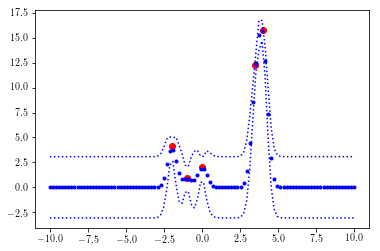

In [7]:
def cov_fun_bell(x1,x2,delta=1):
    return np.exp(-0.5*np.abs(x1-x2)**2/delta) 

def cov_fun_exp(x1,x2):
    return np.exp(-0.5*np.abs(x1-x2)) 

def cov_fun(x1,x2):
    return cov_fun_bell(x1,x2,delta=0.1) 

R = 0.05

x = np.array([-2, -1, 0, 3.5, 4]);
y = np.array([4.1, 0.9, 2, 12.3, 15.8]);

Sig = cov_fun(x.reshape((len(x),1)),x.reshape((1,len(x)))) + R*np.eye(len(x))
SigI = np.linalg.inv(Sig)

xx = np.linspace(-10,10,100)
yy = np.zeros_like(xx)
ss = np.zeros_like(xx)
for i in range(len(xx)):
    z = np.r_[x,xx[i]]
    CrossSig = cov_fun(x,xx[i])
    PriorSig = cov_fun(xx[i],xx[i]) + R
    
    yy[i] = np.dot(np.dot(CrossSig, SigI),y)
    ss[i] = PriorSig - np.dot(np.dot(CrossSig, SigI),CrossSig)
    

plt.plot(x,y,'or')
plt.plot(xx,yy,'b.')
plt.plot(xx,yy+3*np.sqrt(ss),'b:')
plt.plot(xx,yy-3*np.sqrt(ss),'b:')
plt.show()
